In [ ]:
# Step 1: Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()


In [ ]:
# Load the data
df = pd.read_csv('/content/Unbenannte Tabelle - nypd_table.csv')

# Convert 'OCCUR_DATE' to datetime and set it as index
df['OCCUR_DATE'] = pd.to_datetime(df['OCCUR_DATE'], format='%d.%m.%Y')
df.set_index('OCCUR_DATE', inplace=True)

# Group data by date and count incidents
incident_count = df.resample('M').size()


In [ ]:
# Fit an ARIMA model
model = ARIMA(incident_count, order=(7,2,0))
model_fit = model.fit()

In [51]:
# Forecasting for the year 2023
forecast = model_fit.forecast(steps=12)  # Forecasting for 12 months in 2023

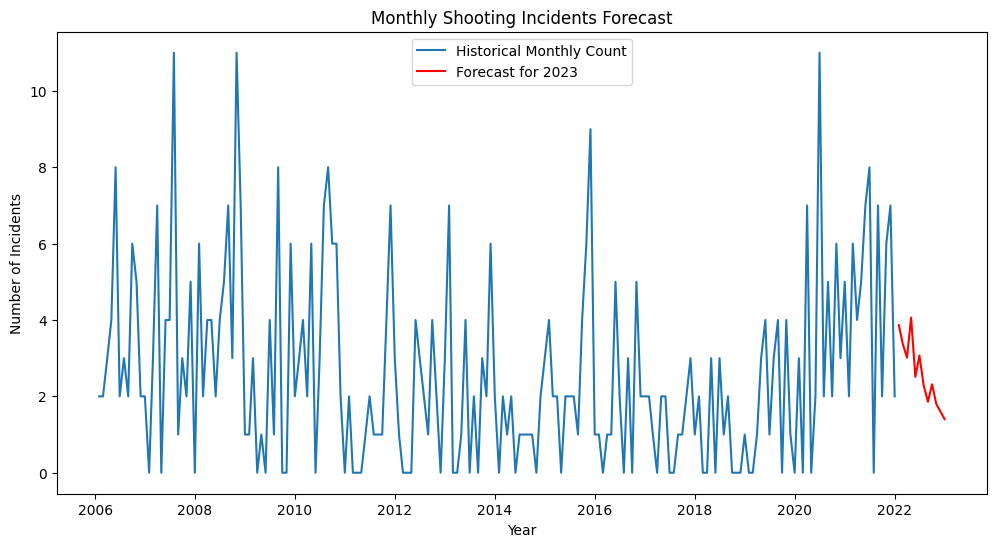

In [50]:
# Plot the historical data and the forecast
plt.figure(figsize=(12,6))
plt.plot(incident_count, label='Historical Monthly Count')
plt.plot(forecast, label='Forecast for 2023', color='red')
plt.title('Monthly Shooting Incidents Forecast')
plt.xlabel('Year')
plt.ylabel('Number of Incidents')
plt.legend()
plt.show()

In [ ]:
from sklearn.metrics import mean_squared_error
from math import sqrt

# Since we don't have actual 2023 data to compare with the forecast, we need to split the historical data.
# We will use a part of the historical data for training and the rest for testing to simulate a forecast and evaluate.

# Train/test split
train = incident_count[:-12]  # Leave out the last 12 months of data for testing
test = incident_count[-12:]   # Test against the last 12 months

# Fit the model on the training data
model = ARIMA(train, order=(5,1,0))
model_fit = model.fit()

# Forecast the next 12 months
forecast = model_fit.forecast(steps=12)

# Calculate RMSE
rmse = sqrt(mean_squared_error(test, forecast))
rmse



2.4996476094607547

In [ ]:
import numpy as np

# Calculate MAE (Mean Absolute Error)
mae = np.mean(np.abs(test - forecast))

mae

2.2342608135345277